# 회귀분석

## 01.단순 선형 회귀

### 01)XY의 형태로 저장

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]
"""
1. X의 형태를 변환하여 train_X에 저장합니다.
"""
train_X = pd.DataFrame(X, columns=['X'])

"""
2. Y의 형태를 변환하여 train_Y에 저장합니다.
"""
train_Y = pd.Series(Y)

### 02) 변환된 데이터를 출력

In [3]:
#2차원
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

#1차원
print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))

전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


### 03) 모델 초기화

- train, test 구분
- But, 자료부족으로 train data만 가지고함

In [4]:
lrmodel=LinearRegression()
lrmodel.fit(train_X, train_Y)

LinearRegression()

### 04) 학습결과 시각화

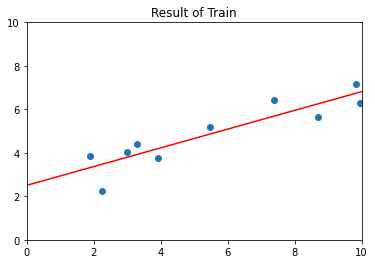

In [5]:
plt.scatter(X,Y)#산점도
plt.plot([0,10],[lrmodel.intercept_, 10*lrmodel.coef_[0]+lrmodel.intercept_], c='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Result of Train')
plt.show()

#### 계수, beta값, 상수

In [6]:
lrmodel.coef_ #계수
lrmodel.coef_[0]

lrmodel.intercept_ #상수

2.5061811708934933

### 05)단순 선형회귀 예측 정리

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = pd.DataFrame(X, columns=['X'])
train_Y = pd.Series(Y)

lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

#train_X의 예측
pred_X=lrmodel.predict(train_X)#나누지 않아서 train_X로 확인함

print('train_X 예측값:\n{}\n'.format(pred_X))
print('실제값:\n{}'.format(train_Y))

train_X 예측값:
[6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749]

실제값:
0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64


## 02.다중 선형회귀

### 01) 데이터 전처리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,FB,TV,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,FB,TV,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FB         200 non-null    float64
 1   TV         200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### 02) XY의 형태로 저장

In [8]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# #기초버젼
# X = df.drop(columns='Sales')
# Y = df.Sales

### 03) 학습용 테스트 셋 분리

In [11]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y, test_size=0.2, random_state=42)
#print(train_X)
#print(test_X)
#print(train_Y)
#print(test_Y)

### 04) 학습

In [12]:
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y) #반드시, train data set

LinearRegression()

### 05) 학습된 파라미터 값 불러오기

In [13]:
beta_0=lrmodel.intercept_#y절편
beta_1=lrmodel.coef_[0]  #1번째 변수에 대한 계수
beta_2=lrmodel.coef_[1]  #2번째 변수에 대한 계수
beta_3=lrmodel.coef_[2]  #3번째 변수에 대한 계수

print(beta_0)
print(beta_1)
print(beta_2)
print(beta_3)

2.979067338122629
0.044729517468716326
0.18919505423437652
0.0027611143413671935


### 06) 다중회기분석 예측

In [14]:
lrmodel.predict(test_X)

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [15]:
df1=pd.DataFrame(np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1]]),columns=['FB','TV','Newspaper'])
df1

,FB,TV,Newspaper
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,1,1


In [16]:
lrmodel.predict(df1)

array([2.97906734, 3.02379686, 3.16826239, 2.98182845, 3.21575302])

## 03.평가지표

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 01) train_X, MSE, MAE 계산

In [18]:
pred_train = lrmodel.predict(train_X)
pred_test=lrmodel.predict(test_X)

MAE_train= mean_absolute_error(train_Y, pred_train)
MSE_train = mean_squared_error(train_Y, pred_train)

print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

MSE_train : 2.705129
MAE_train : 1.198468


### 02) test_X, MSE, MAE 계산

In [19]:
MAE_test= mean_absolute_error(test_Y, pred_test)
MSE_test = mean_squared_error(test_Y, pred_test)

print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_test : 3.174097
MAE_test : 1.460757


### 03) train_X 결정계수

In [20]:
R2_train=r2_score(train_Y,pred_train)
print('R2_trian: %f'%R2_train)

R2_trian: 0.895701


In [21]:
#test_X 예측값
pred_test=lrmodel.predict(test_X)

In [22]:
R2_test=r2_score(test_Y, pred_test)
print('R2_test: %f'%R2_test)

R2_test: 0.899438
